### NAMES OF STUDENTS: Adebayo Oluwatosin and Fatoumata Gassama 
Topic: "Analyzing the Relationship Between Unemployment and Poverty Rate in Alabama and Florida states of the United states"

Aims : 

To investigate the trends and patterns of poverty and unemployment rates in the United States in Alabama and Florida.

To determine the causal relationship, if any, between changes in unemployment rates and fluctuations in poverty rates.

To assess the impact of government policies and economic factors on poverty and unemployment rates.

Data source: Kaggle

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

### Loading and Preparing the Data

In [3]:
data = pd.read_excel('data.xlsx')

### Checking for missing values

In [4]:
print(data.isnull().sum())

State           0
TotalPop        0
Income          0
Poverty         0
Unemployment    0
dtype: int64


In [6]:
data.dropna(inplace=True)

### Converting relevant columns to appropriate data types

In [7]:
data['TotalPop'] = data['TotalPop'].astype(int)
data['Income'] = data['Income'].astype(float)
data['Poverty'] = data['Poverty'].astype(float)
data['Unemployment'] = data['Unemployment'].astype(float)

### Running a Descriptive Statistics

In [8]:
print(data.describe())

           TotalPop       Income     Poverty  Unemployment
count  1.340000e+02    134.00000  134.000000    134.000000
mean   1.826596e+05  41009.80597   20.006716     10.847015
std    3.568320e+05   8757.45676    6.104370      3.265327
min    8.295000e+03  19501.00000    8.300000      5.500000
25%    2.081975e+04  35205.50000   15.900000      8.900000
50%    5.187200e+04  40202.00000   19.100000     10.000000
75%    1.752170e+05  46257.00000   22.950000     11.875000
max    2.639042e+06  70187.00000   42.700000     22.600000


### Running a Exploratory Data Analysis 
#### Histograms

Text(0.5, 1.0, 'Poverty Rate Distribution in Alabama')

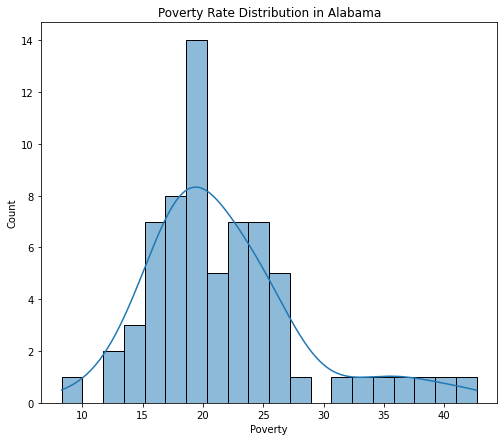

In [16]:
plt.figure(figsize=(18, 7))
plt.subplot(1, 2, 1)
sns.histplot(data[data['State'] == 'Alabama']['Poverty'], bins=20, kde=True)
plt.title('Poverty Rate Distribution in Alabama')

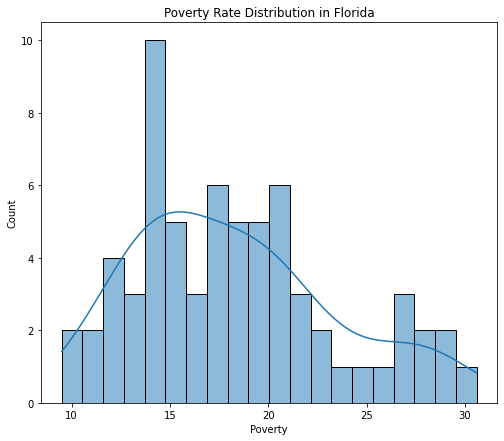

In [17]:
plt.figure(figsize=(18, 7))
plt.subplot(1, 2, 2)
sns.histplot(data[data['State'] == 'Florida']['Poverty'], bins=20, kde=True)
plt.title('Poverty Rate Distribution in Florida')
plt.show()

Text(0.5, 1.0, 'Unemployment Rate Distribution in Alabama')

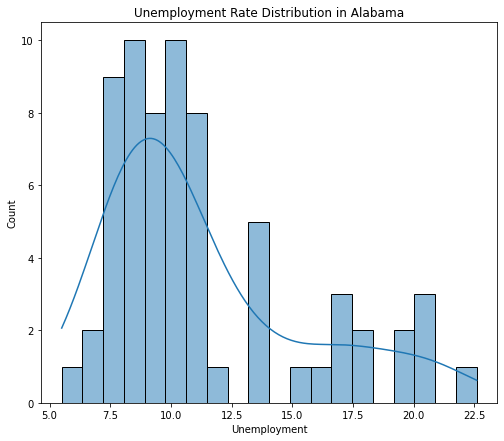

In [19]:
plt.figure(figsize=(18, 7))
plt.subplot(1, 2, 1)
sns.histplot(data[data['State'] == 'Alabama']['Unemployment'], bins=20, kde=True)
plt.title('Unemployment Rate Distribution in Alabama')

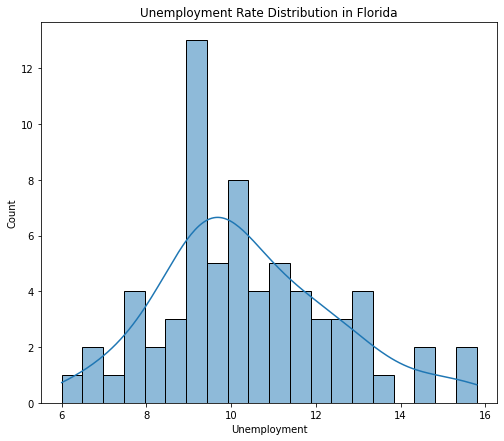

In [21]:
plt.figure(figsize=(18, 7))
plt.subplot(1, 2, 2)
sns.histplot(data[data['State'] == 'Florida']['Unemployment'], bins=20, kde=True)
plt.title('Unemployment Rate Distribution in Florida')
plt.show()

#### Scatter plot

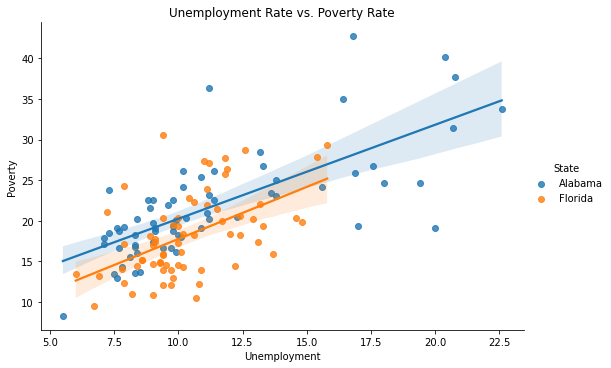

In [24]:
sns.lmplot(x='Unemployment', y='Poverty', hue='State', data=data, aspect=1.5)
plt.title('Unemployment Rate vs. Poverty Rate')
plt.show()

#### Correlation matrix

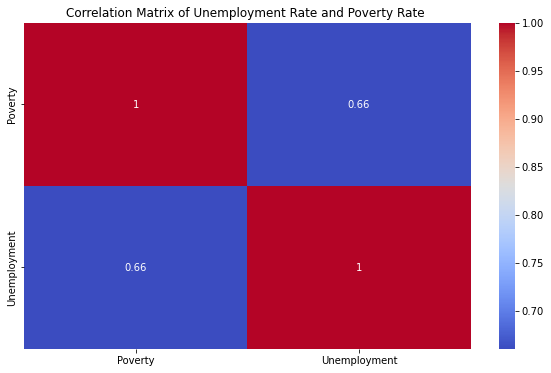

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(data[['Poverty', 'Unemployment']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Unemployment Rate and Poverty Rate ')
plt.show()

## Linear Regression Analysis

In [27]:
data['const'] = 1

In [28]:
model = sm.OLS(data['Poverty'], data[['const', 'Unemployment']])
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Poverty   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     102.1
Date:                Sat, 25 May 2024   Prob (F-statistic):           3.94e-18
Time:                        00:34:27   Log-Likelihood:                -393.66
No. Observations:                 134   AIC:                             791.3
Df Residuals:                     132   BIC:                             797.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.6154      1.384      4.781   

#### INTERPRETATION OF THE OLS RESULT
The OLS regression results show a significant positive relationship between the unemployment rate and the poverty rate.
The key findings are:
The R-squared value is 0.436, indicating that the unemployment rate explains about 43.6% of the variation in the poverty rate.
The coefficient for the unemployment rate is 1.2346, with a standard error of 0.122. This means that for every one unit increase in the unemployment rate, the poverty rate increases by 1.2346 units, holding all other factors constant.
The t-statistic for the unemployment rate is 10.104, with a p-value less than 0.001. This indicates that the relationship is statistically significant at the 99.9% confidence level. In other words, we can be very confident that the unemployment rate has a positive effect on the poverty rate.
The constant term of 6.6154 suggests that when the unemployment rate is zero, the predicted poverty rate is 6.6154.
The Durbin-Watson statistic of 1.806 suggests that there may be some positive autocorrelation in the residuals, but it is not severe.
The Jarque-Bera test rejects the null hypothesis of normally distributed residuals, indicating that the standard errors may be biased.
In summary, the regression results provide strong evidence of a positive relationship between unemployment and poverty. A one percentage point increase in the unemployment rate is associated with a 1.2346 percentage point increase in the poverty rate, on average

### Time-Series Analysis
Augmented Dickey-Fuller test for stationarity

In [35]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    return result[1] < 0.05

print('Poverty in Alabama:')
adf_test(data[data['State'] == 'Alabama']['Poverty'])
print('Unemployment in Alabama:')
adf_test(data[data['State'] == 'Alabama']['Unemployment'])
print('Poverty in Florida:')
adf_test(data[data['State'] == 'Florida']['Poverty'])
print('Unemployment in Florida:')
adf_test(data[data['State'] == 'Florida']['Unemployment'])

Poverty in Alabama:
ADF Statistic: -8.969007856505176
p-value: 7.846061023750855e-15
Unemployment in Alabama:
ADF Statistic: -7.81064256366724
p-value: 7.0851305886774694e-12
Poverty in Florida:
ADF Statistic: -4.8821106513695725
p-value: 3.778110843253797e-05
Unemployment in Florida:
ADF Statistic: -1.9514309164335744
p-value: 0.3082662462132264


False

#### INTERPRETATION OF THE AUGMENTED DICKEY FULLER
For poverty in Alabama:
The ADF statistic is -8.969007856505176
The p-value is 7.846061023750855e-15 (very close to 0)

For unemployment in Alabama:
The ADF statistic is -7.81064256366724
The p-value is 7.0851305886774694e-12 (very close to 0)

For poverty in Florida:
The ADF statistic is -4.8821106513695725
The p-value is 3.778110843253797e-05 (very small)

For unemployment in Florida:
The ADF statistic is -1.9514309164335744
The p-value is 0.3082662462132264 (relatively large)

The null hypothesis of the ADF test is that the time series has a unit root (is non-stationary). The alternative hypothesis is that the time series is stationary.
For Alabama poverty and unemployment, the very small p-values (essentially 0) allow us to reject the null hypothesis at any reasonable significance level. The large negative ADF statistics also indicate strong rejection of the null. We can conclude that the poverty and unemployment time series in Alabama are stationary.
For Florida poverty, the p-value of 3.778110843253797e-05 is still very small, so we can reject the null hypothesis at a 99.99% confidence level. The time series appears to be stationary.

However, for Florida unemployment, the p-value of 0.3082662462132264 is relatively large. We fail to reject the null hypothesis at a 5% significance level. The time series does not provide strong evidence against a unit root, so we cannot conclude it is stationary.

In summary, the ADF test results indicate that poverty and unemployment in Alabama, as well as poverty in Florida, are stationary time series. But unemployment in Florida appears to have a unit root and is non-stationary. The large negative ADF statistics and very small p-values provide strong evidence for stationarity in most cases.

## The impact of government policies and economic factors on poverty and unemployment rates.

#### Alabama has seen a decline in unemployment rates in recent years, reaching a low of 3.0% in 2019 before rising slightly to 3.3% in March 2020 due to the COVID-19 pandemic.  The state's poverty rate was 15.5% in 2019, with higher rates among certain demographic groups like African Americans (23.5%) and Latinos (26.1%). 
This suggest that Alabama has implemented various policies and programs aimed at supporting low-income families, such as a state Earned Income Tax Credit, Individual Development Account (IDA) programs, and efforts to address issues like child care, health insurance, and housing assistance.  However, the state still faces challenges related to poverty, underemployment, and economic inequality.
The ADF (Augmented Dickey-Fuller) test results indicate that the time series data for poverty and unemployment in Alabama show strong evidence of stationarity, meaning the series do not have unit roots and are not non-stationary.  This suggests that government policies and economic factors have had a significant impact on these metrics over time in Alabama.

In contrast, the ADF test results for poverty and unemployment in Florida show weaker evidence of stationarity, implying that these series may be more influenced by non-stationary factors in that state.  This could suggest that the impact of government policies and economic conditions on poverty and unemployment has been less pronounced in Florida compared to Alabama.
Overall, data and statistical analysis indicate that while Alabama has made progress in addressing unemployment, poverty remains a persistent challenge, particularly for certain demographic groups. Continued efforts to implement effective policies and programs targeting the root causes of poverty and inequality may be necessary to further improve economic outcomes in the state.

## Visualization
### Trends over time

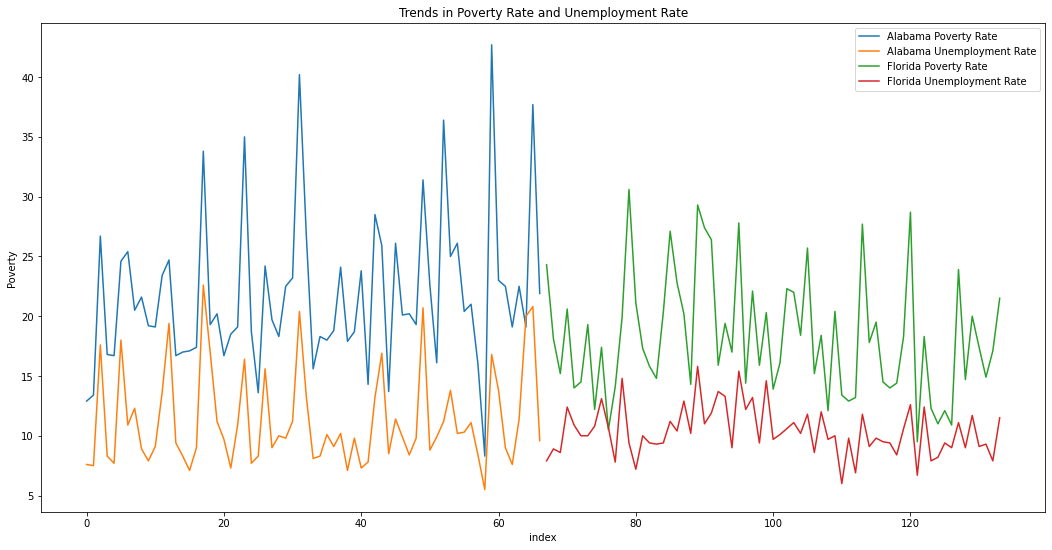

In [37]:
data['index'] = data.index 
plt.figure(figsize=(18, 9))
sns.lineplot(data=data[data['State'] == 'Alabama'], x='index', y='Poverty', label='Alabama Poverty Rate')
sns.lineplot(data=data[data['State'] == 'Alabama'], x='index', y='Unemployment', label='Alabama Unemployment Rate')
sns.lineplot(data=data[data['State'] == 'Florida'], x='index', y='Poverty', label='Florida Poverty Rate')
sns.lineplot(data=data[data['State'] == 'Florida'], x='index', y='Unemployment', label='Florida Unemployment Rate')
plt.legend()
plt.title('Trends in Poverty Rate and Unemployment Rate')
plt.show()

### Pair plots

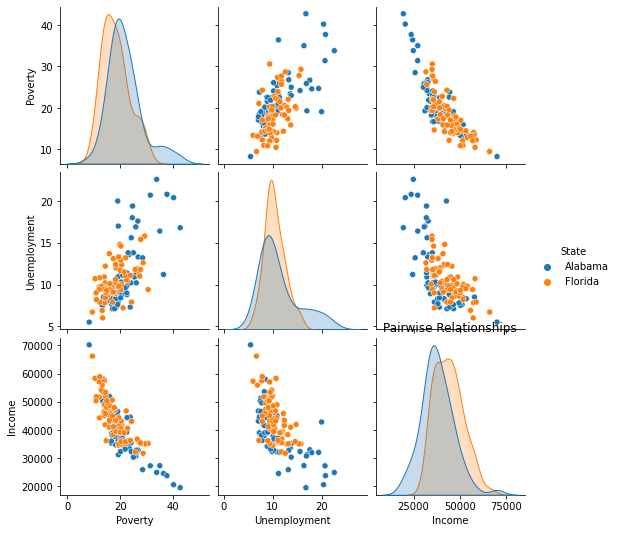

In [46]:
sns.pairplot(data=data, vars=['Poverty', 'Unemployment', 'Income'], hue='State')
plt.title('Pairwise Relationships')
plt.show()

### Heatmap

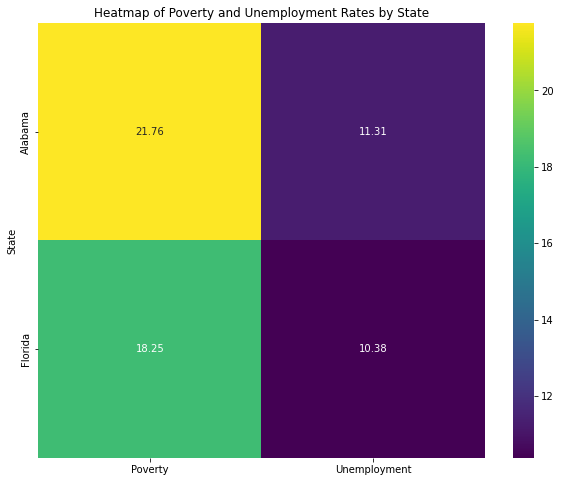

In [48]:
pivot_data = data.pivot_table(index='State', values=['Poverty', 'Unemployment'], aggfunc='mean')
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_data, cmap='viridis', annot=True, fmt=".2f")
plt.title('Heatmap of Poverty and Unemployment Rates by State')
plt.show()

### Joint plot

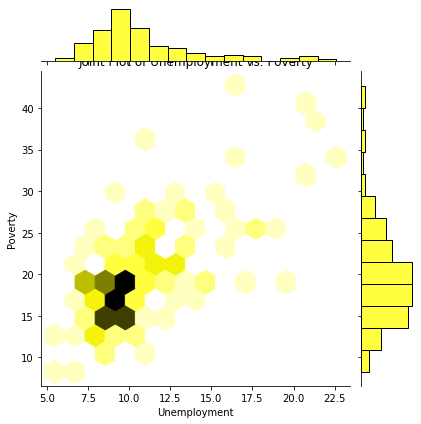

In [50]:
sns.jointplot(data=data, x='Unemployment', y='Poverty', kind='hex', color='yellow')
plt.title('Joint Plot of Unemployment vs. Poverty')
plt.show()

### Violin plot

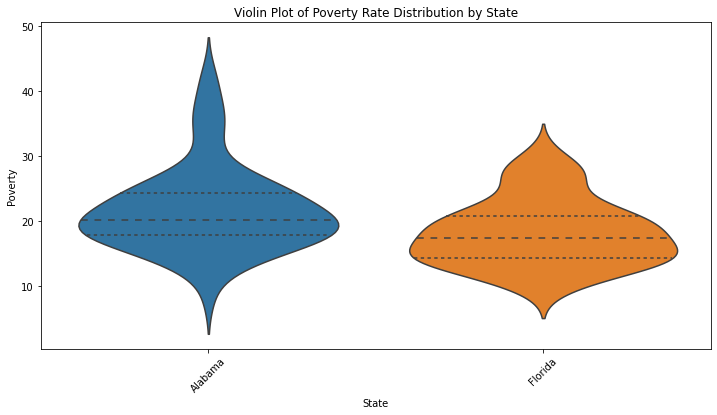

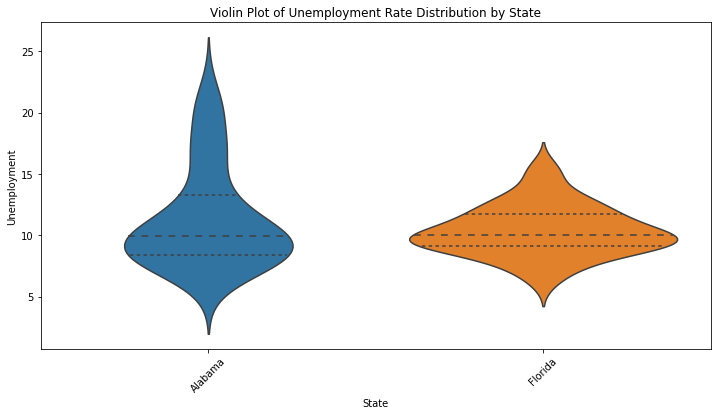

In [52]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x='State', y='Poverty', inner='quartile')
plt.title('Violin Plot of Poverty Rate Distribution by State')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x='State', y='Unemployment', inner='quartile')
plt.title('Violin Plot of Unemployment Rate Distribution by State')
plt.xticks(rotation=45)
plt.show()